<a href="https://colab.research.google.com/github/Kwasi-Dankwa/Game-sales/blob/main/gamemodelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NINTENDO GAME SALES PREDICTIVE MODELLING

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# loading csv
df = pd.read_csv('/content/cleanvgdata.csv')
df.head(20)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


# EDA PHASE

In [3]:
# column statistic
df.describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16451.000000,16451.000000,16451.000000,16451.000000,16451.000000,16451.000000,16451.000000
mean,8291.215853,2006.412984,0.265368,0.147442,0.078185,0.048299,0.539567
std,4792.844853,5.815858,0.819648,0.507391,0.310507,0.189341,1.561140
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4134.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8289.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12440.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16451 entries, 0 to 16450
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16451 non-null  int64  
 1   name          16451 non-null  object 
 2   platform      16451 non-null  object 
 3   year          16451 non-null  int64  
 4   genre         16451 non-null  object 
 5   publisher     16451 non-null  object 
 6   na_sales      16451 non-null  float64
 7   eu_sales      16451 non-null  float64
 8   jp_sales      16451 non-null  float64
 9   other_sales   16451 non-null  float64
 10  global_sales  16451 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [6]:
df.shape

(16451, 11)

In [5]:
# checking for null values
df.isnull().sum()

,0
rank,0
name,0
platform,0
year,0
genre,0
publisher,0
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0


This confirms the data set was cleaned using sql as there are no columns with null values

# VISUALIZATIONS

array([[<Axes: title={'center': 'rank'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'na_sales'}>],
       [<Axes: title={'center': 'eu_sales'}>,
        <Axes: title={'center': 'jp_sales'}>,
        <Axes: title={'center': 'other_sales'}>],
       [<Axes: title={'center': 'global_sales'}>, <Axes: >, <Axes: >]],
      dtype=object)

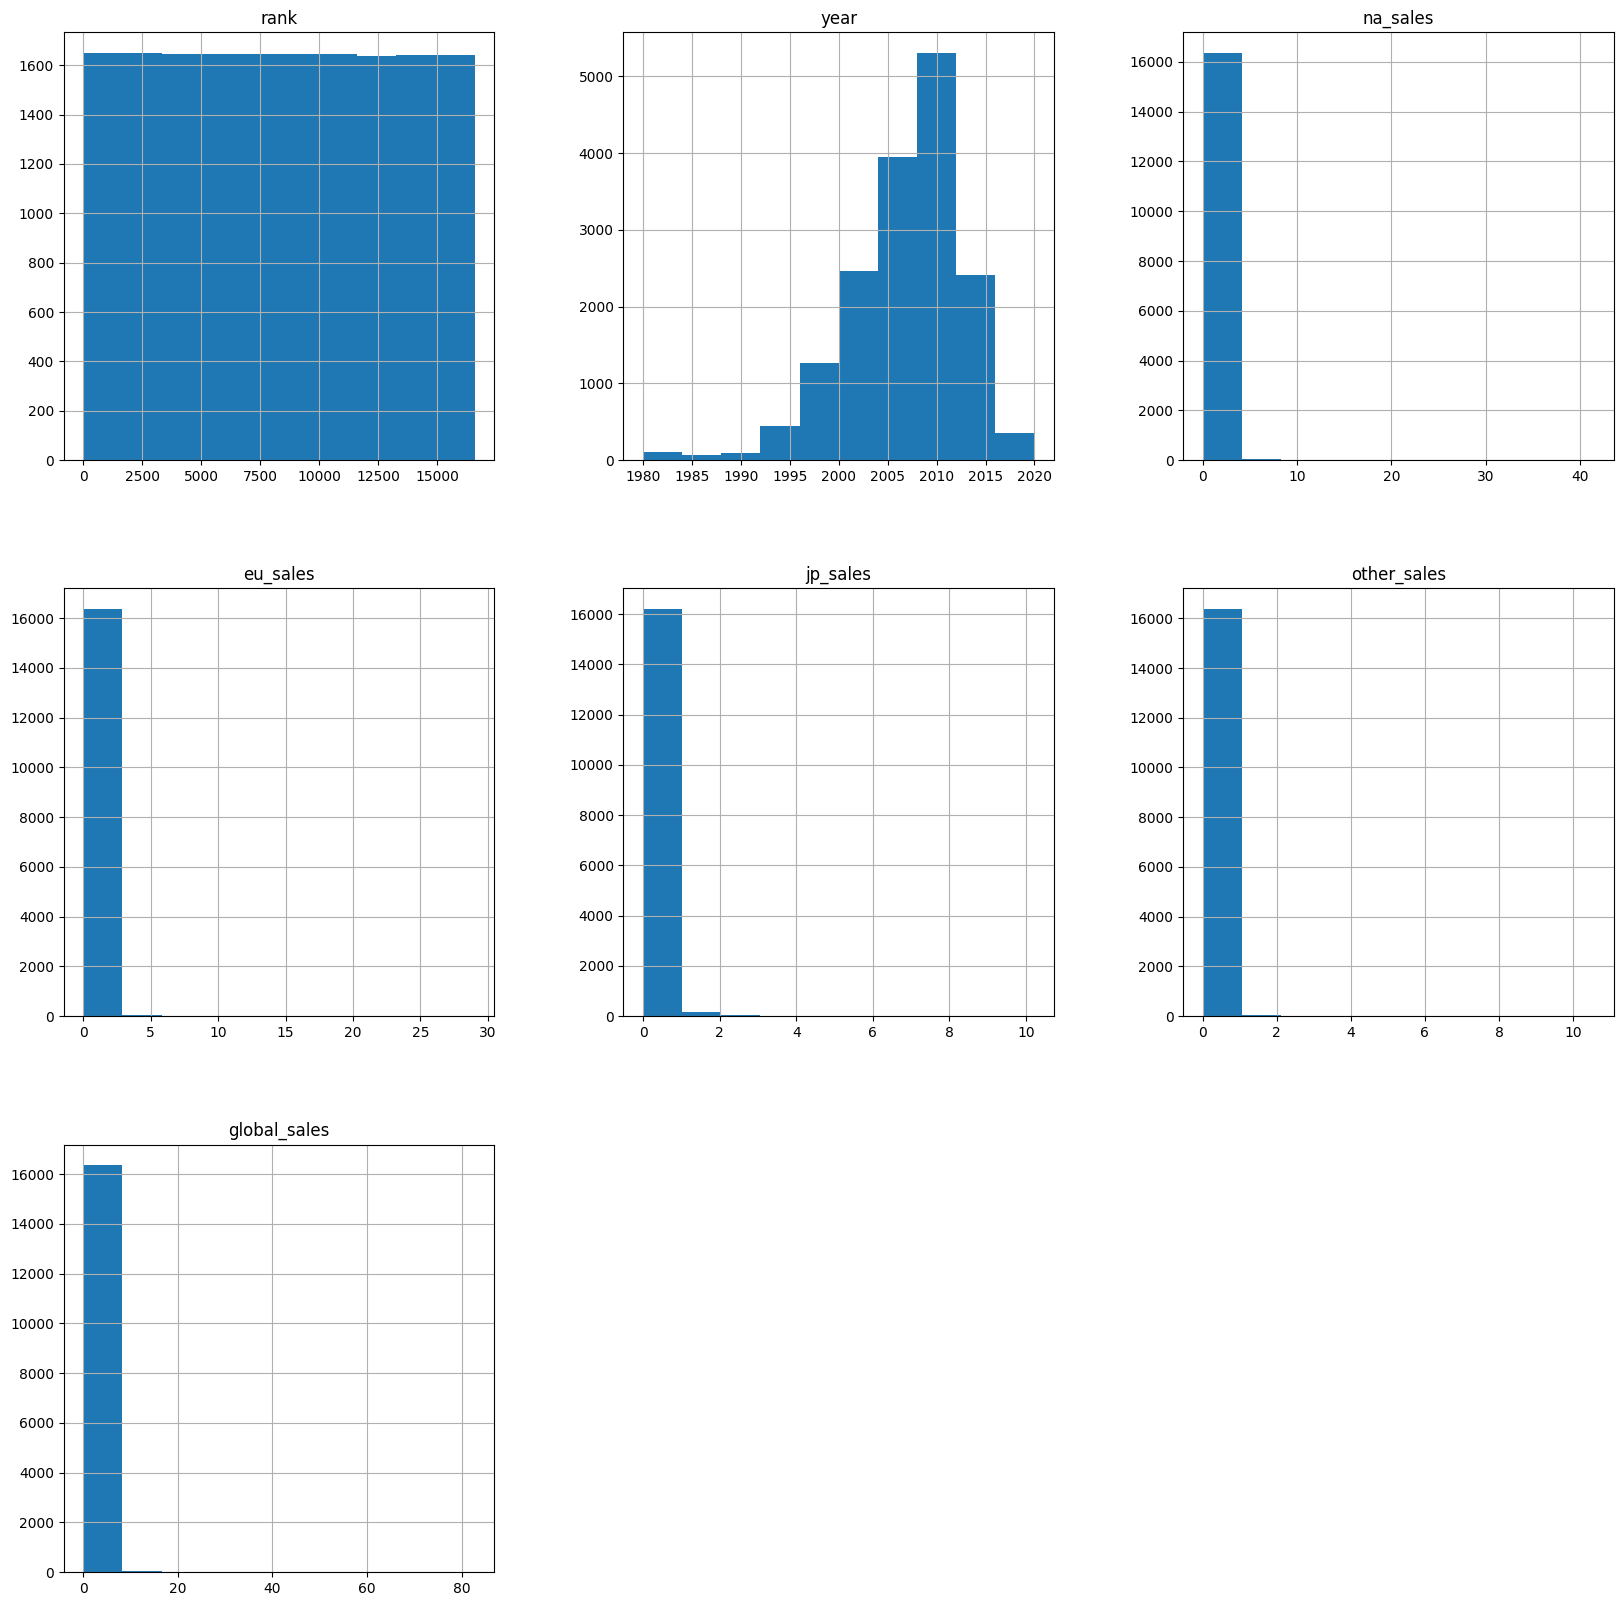

In [7]:
#  Histogram/ Visualization
df.hist(figsize=(20,20) )

In [8]:
# Filter for Nintendo games and relevant years (2010-2016)
nintendo_df = df[(df['publisher'] == 'Nintendo') & (df['year'].between(2010, 2016))].copy()
industry_df = df[df['year'].between(2010, 2016)].copy()

In [9]:
# Convert year to integer
nintendo_df['year'] = nintendo_df['year'].astype(int)
industry_df['year'] = industry_df['year'].astype(int)

In [10]:
print(f"Nintendo data rows after filtering: {nintendo_df.shape[0]}")
print(f"Industry data rows after filtering: {industry_df.shape[0]}")

Nintendo data rows after filtering: 171
Industry data rows after filtering: 5188


# --- 2. KPI ANALYSIS ---


In [11]:
# **Q1: How has Nintendo’s market share evolved annually?**
# Calculate annual global sales for Nintendo and the entire industry
nintendo_annual_sales = nintendo_df.groupby('year')['global_sales'].sum().reset_index()
industry_annual_sales = industry_df.groupby('year')['global_sales'].sum().reset_index()

In [12]:
# Merges and calculate market share
market_share_df = nintendo_annual_sales.merge(
    industry_annual_sales, on='year', suffixes=('_nintendo', '_industry')
)
market_share_df['market_share'] = (market_share_df['global_sales_nintendo'] / market_share_df['global_sales_industry']) * 100

print("\n--- Nintendo Annual Market Share (2010-2016) ---")
print(market_share_df[['year', 'market_share']].to_markdown(index=False, numalign="left", stralign="left"))


--- Nintendo Annual Market Share (2010-2016) ---
| year   | market_share   |
|:-------|:---------------|
| 2010   | 10.0809        |
| 2011   | 9.92488        |
| 2012   | 15.3247        |
| 2013   | 14.3206        |
| 2014   | 14.4187        |
| 2015   | 10.2405        |
| 2016   | 4.89215        |


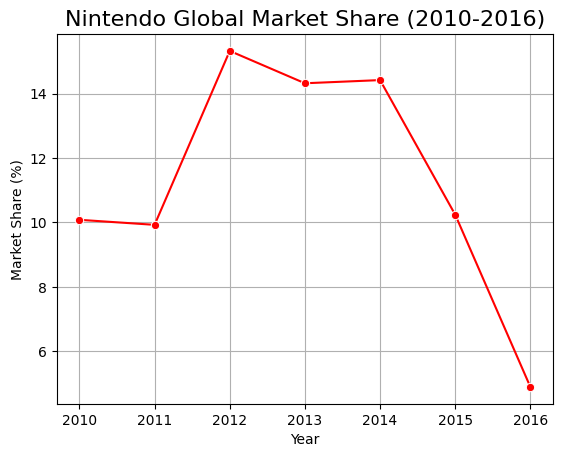

In [14]:
# Plot market share evolution
plt.figure()
sns.lineplot(x='year', y='market_share', data=market_share_df, marker='o', color='red')
plt.title('Nintendo Global Market Share (2010-2016)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Market Share (%)')
plt.xticks(market_share_df['year'])
plt.grid(True)
plt.show()

In [15]:
# **Q2: Which genres (top 3 annually) drove outsized performance?**
print("\n--- Top 3 Nintendo Genres by Global Sales per Year ---")
top_genres_by_year = nintendo_df.groupby(['year', 'genre'])['global_sales'].sum().reset_index()
top_genres_by_year['rank'] = top_genres_by_year.groupby('year')['global_sales'].rank(method='first', ascending=False)
top_genres = top_genres_by_year[top_genres_by_year['rank'] <= 3].sort_values(by=['year', 'rank'])

print(top_genres[['year', 'genre', 'global_sales']].to_markdown(index=False, numalign="left", stralign="left"))


--- Top 3 Nintendo Genres by Global Sales per Year ---
| year   | genre        | global_sales   |
|:-------|:-------------|:---------------|
| 2010   | Role-Playing | 21.17          |
| 2010   | Platform     | 19             |
| 2010   | Misc         | 11.32          |
| 2011   | Platform     | 13.53          |
| 2011   | Racing       | 12.21          |
| 2011   | Action       | 10.74          |
| 2012   | Role-Playing | 18.36          |
| 2012   | Platform     | 15.01          |
| 2012   | Simulation   | 9.81           |
| 2013   | Role-Playing | 18.39          |
| 2013   | Platform     | 10.88          |
| 2013   | Action       | 9.83           |
| 2014   | Role-Playing | 18.79          |
| 2014   | Fighting     | 12.47          |
| 2014   | Racing       | 6.96           |
| 2015   | Role-Playing | 5.56           |
| 2015   | Platform     | 5.24           |
| 2015   | Shooter      | 4.57           |
| 2016   | Action       | 3.05           |
| 2016   | Shooter      | 0.35           


--- Total Regional Sales Contribution (2010-2016) ---
|             | 0      |
|:------------|:-------|
| na_sales    | 112.68 |
| jp_sales    | 88.56  |
| eu_sales    | 80.87  |
| other_sales | 19     |


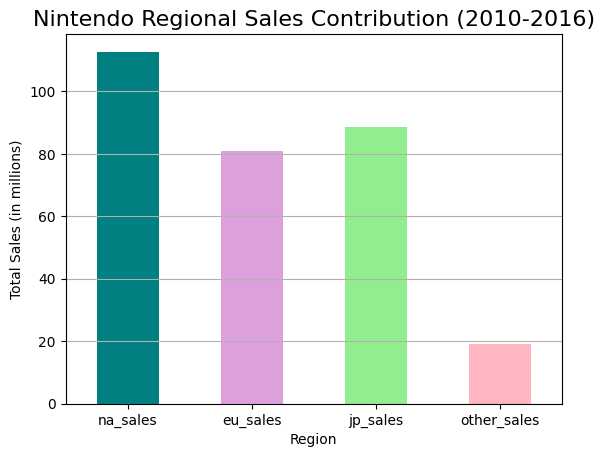

In [16]:
# **Q3: Which regions contribute most to sales?**
regional_sales = nintendo_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
print("\n--- Total Regional Sales Contribution (2010-2016) ---")
print(regional_sales.sort_values(ascending=False).to_markdown(numalign="left", stralign="left"))

# Plot regional sales contribution
plt.figure()
regional_sales.plot(kind='bar', color=['#008080', '#DDA0DD', '#90EE90', '#FFB6C1'])
plt.title('Nintendo Regional Sales Contribution (2010-2016)', fontsize=16)
plt.xlabel('Region')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()